# 과제#3. [평가] 이동통신 고객 이탈 예측

* 여러분은 OO 통신회사 데이터분석가 입니다.
* 00 통신회사의 올해 고객 목표는, **현재 고객수를 유지**하는 것입니다.
* 더욱 치열해진 경쟁 상황에서 고객수를 유지하는 것은 굉장히 도전적인 목표 입니다.
* 이를 위해 회사는 약정기간이 끝난 고객이 번호이동(이탈)해 가는 문제를 해결하고자 합니다.
* 그래서 에이블러 여러분에게, 어떤 고객이 번호이동(이탈)해 가는지 예측 모델링을 의뢰하였습니다.

![](https://d18lkz4dllo6v2.cloudfront.net/cumulus_uploads/entry/23964/mobile%20phones.png)

## 0.환경설정

### 1) 라이브러리 로딩

In [134]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

### 2) 데이터 로딩

In [135]:
# mobile data
data_path = "https://raw.githubusercontent.com/DA4BAM/dataset/master/mobile_NA2.csv"
data = pd.read_csv(data_path)
data.head()

,id,COLLEGE,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,AVERAGE_CALL_DURATION,REPORTED_SATISFACTION,REPORTED_USAGE_LEVEL,CONSIDERING_CHANGE_OF_PLAN,CHURN
0,544,1,47711,183,17,730589.0,192,19,5,unsat,little,considering,0
1,689,0,74132,191,43,535092.0,349,15,2,unsat,very_little,no,1
2,3134,1,150419,0,14,204004.0,682,0,6,unsat,very_high,considering,0
3,12523,0,159567,0,58,281969.0,634,1,1,very_unsat,very_high,never_thought,0
4,2374,1,23392,0,0,216707.0,233,0,15,unsat,very_little,no,1


|변수 명|내용|구분|
|	----	|	----	|	----	|
|	COLLEGE	|	대학졸업 여부(1,0) - 범주	|		|
|	INCOME	|	연 수입액(달러)	|		|
|	OVERAGE	|	월 초과사용 시간(분)	|		|
|	LEFTOVER	|	월 사용 잔여시간비율(%)	|		|
|	HOUSE	|	집 가격(달러)	|		|
|	HANDSET_PRICE	|	핸드폰 가격(달러)	|		|
|	OVER_15MINS_CALLS_PER_MONTH	|	 평균 장기통화(15분 이상) 횟수	|		|
|	AVERAGE_CALL_DURATION	|	평균 통화시간(분)	|		|
|	REPORTED_SATISFACTION	|	만족도 설문('very_unsat', 'unsat', 'avg', 'sat', 'very_sat' ) - 범주	|		|
|	REPORTED_USAGE_LEVEL	|	사용 수준 설문('very_little', 'little', 'avg', 'high', 'very_high') - 범주	|		|
|	CONSIDERING_CHANGE_OF_PLAN	|	변경 계획 설문('never_thought', 'no', 'perhaps', 'considering',   'actively_looking_into_it') - 범주	|		|
|	**CHURN**	|	이탈여부(1 : 이탈, 0 : 잔류)	|	**Target**	|


----

In [136]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 13 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           18000 non-null  int64  
 1   COLLEGE                      18000 non-null  int64  
 2   INCOME                       18000 non-null  int64  
 3   OVERAGE                      18000 non-null  int64  
 4   LEFTOVER                     18000 non-null  int64  
 5   HOUSE                        17785 non-null  float64
 6   HANDSET_PRICE                18000 non-null  int64  
 7   OVER_15MINS_CALLS_PER_MONTH  18000 non-null  int64  
 8   AVERAGE_CALL_DURATION        18000 non-null  int64  
 9   REPORTED_SATISFACTION        17962 non-null  object 
 10  REPORTED_USAGE_LEVEL         18000 non-null  object 
 11  CONSIDERING_CHANGE_OF_PLAN   18000 non-null  object 
 12  CHURN                        18000 non-null  int64  
dtypes: float64(1), i

## 1.데이터 탐색

## 2.데이터 전처리 

In [137]:
target = 'CHURN'

### 2.1 데이터 정리

* feature와 , target으로 분할

In [138]:
x = data.drop(target, axis = 1)
y = data.loc[:, target]

* 불필요한 feature 제거
    * 제거해야 할 feature를 선정하고 제거하시오. 제거 이유를 주석으로 기술합니다.

- 데이터 분석과 상관없는 고객 id를 제거하고 시작

In [139]:
x = x.drop(['id'], axis=1)

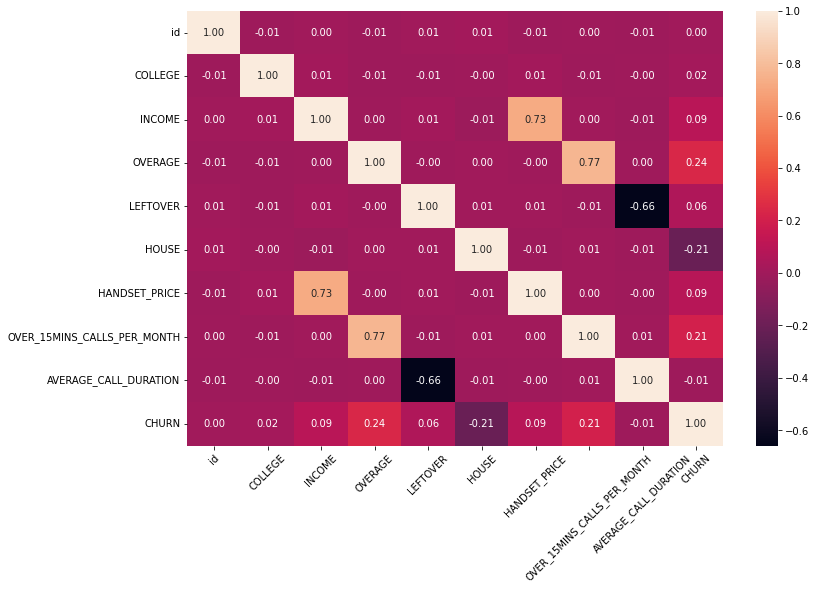

In [140]:
plt.figure(figsize=(12, 8))
sns.heatmap(data.corr(), annot=True, cmap='rocket', fmt='.2f')
plt.xticks(rotation=45)
plt.show()

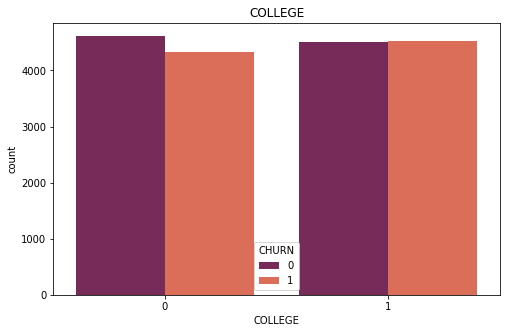

In [141]:
plt.figure(figsize=(8,5))
sns.countplot(x='COLLEGE',hue=target, data=data, palette='rocket')
plt.title("COLLEGE")
plt.show()

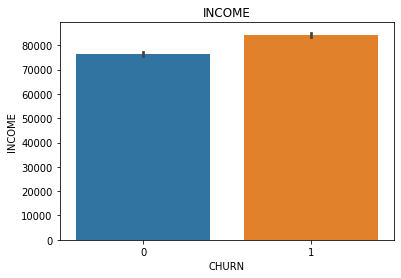

In [142]:
sns.barplot(x="CHURN", y="INCOME", data=data)
plt.title("INCOME")
plt.show()

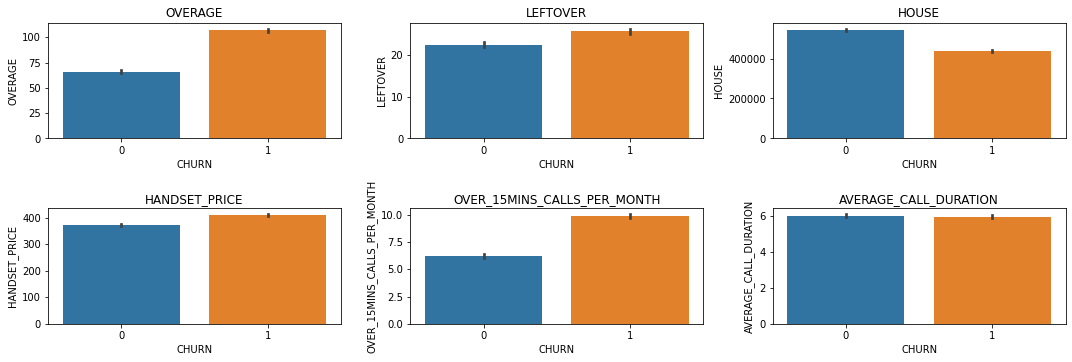

In [143]:
plt.figure(figsize=(15,15))
plt.subplot(6,3,1)
sns.barplot(x="CHURN", y="OVERAGE", data=data)
plt.title("OVERAGE")
plt.subplot(6,3,2)
sns.barplot(x="CHURN", y="LEFTOVER", data=data)
plt.title("LEFTOVER")
plt.subplot(6,3,3)
sns.barplot(x="CHURN", y="HOUSE", data=data)
plt.title("HOUSE")
plt.subplot(6,3,4)
sns.barplot(x="CHURN", y="HANDSET_PRICE", data=data)
plt.title("HANDSET_PRICE")
plt.subplot(6,3,5)
sns.barplot(x="CHURN", y="OVER_15MINS_CALLS_PER_MONTH", data=data)
plt.title("OVER_15MINS_CALLS_PER_MONTH")
plt.subplot(6,3,6)
sns.barplot(x="CHURN", y="AVERAGE_CALL_DURATION", data=data)
plt.title("AVERAGE_CALL_DURATION")
plt.tight_layout()
plt.show()

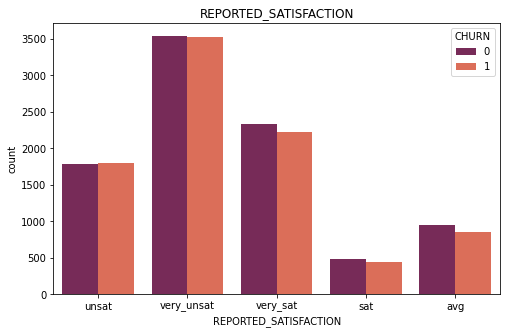

In [144]:
plt.figure(figsize=(8,5))
sns.countplot(x='REPORTED_SATISFACTION',hue=target, data=data, palette='rocket')
plt.title("REPORTED_SATISFACTION")
plt.show()

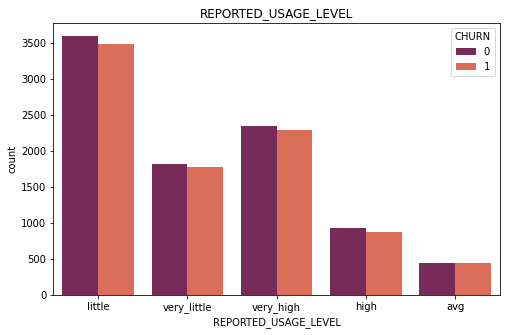

In [145]:
plt.figure(figsize=(8,5))
sns.countplot(x='REPORTED_USAGE_LEVEL',hue=target, data=data, palette='rocket')
plt.title("REPORTED_USAGE_LEVEL")
plt.show()

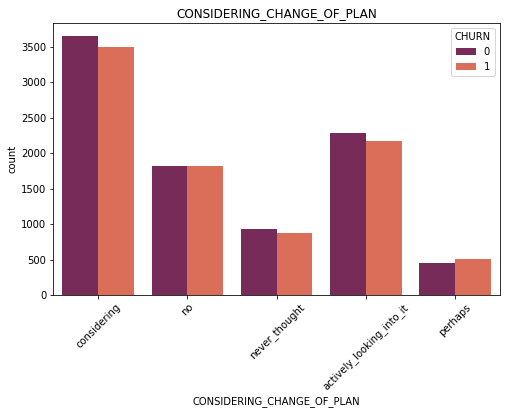

In [146]:
plt.figure(figsize=(8,5))
sns.countplot(x='CONSIDERING_CHANGE_OF_PLAN',hue=target, data=data, palette='rocket')
plt.title("CONSIDERING_CHANGE_OF_PLAN")
plt.xticks(rotation=45)
plt.show()

In [147]:
x = x.drop(['COLLEGE', 'AVERAGE_CALL_DURATION'], axis=1)

target과의 상관관계가 절댓값 0.05 보다 적고 시각화 했을때도 크게 연관성이 확인이 되지 않는

COLLEGE와 AVERAGE_CALL_DURATION을 삭제함

### 2.2 NaN에 대한 조치
* 데이터에 포함된 NaN에 대해서 조치 방법을 결정하고 적용합니다.
* **조치방법을 결정한 이유**를 주석으로 기술합니다.

In [148]:
x.isna().sum()

INCOME                           0
OVERAGE                          0
LEFTOVER                         0
HOUSE                          215
HANDSET_PRICE                    0
OVER_15MINS_CALLS_PER_MONTH      0
REPORTED_SATISFACTION           38
REPORTED_USAGE_LEVEL             0
CONSIDERING_CHANGE_OF_PLAN       0
dtype: int64

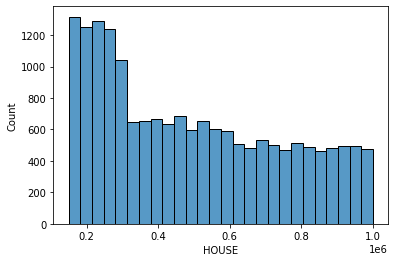

In [149]:
sns.histplot(data['HOUSE'])
plt.show()

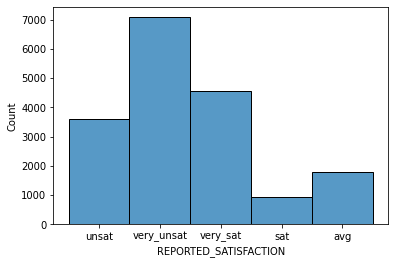

In [150]:
sns.histplot(data['REPORTED_SATISFACTION'])
plt.show()

- NaN값이 포함된 두 feature 모두 삭제를 제외한 일반적인 방법(평균, 중앙값 등)으로 조치를 하기에 복잡한 형태임

- House는 분포가 한쪽에 치우쳐져있고 SATISFACTIONI은 설문조사의 특성상 추가적인 데이터 없이 임의로 채워넣기가 어려움

- 가변수화 후 KNNImputer를 이용해 결측치를 처리하려고 함

### 2.3 (옵션) 추가변수 도출
* 기존 데이터셋의 변수를 이용하여 추가로 도출할 수 있는 변수가 있다면 수행합니다.
* 추가변수 생성시, 이유에 대해서 **주석**으로 기술합니다.

### 2.4 가변수화
* 범주형 데이터이면서 값이 0,1 로 되어 있는 것이 아니라면, 가변수화를 수행해야 합니다.
* 대상이 되는 변수에 대해서 가변수화를 수행해주세요.

In [151]:
x.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18000 entries, 0 to 17999
Data columns (total 9 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   INCOME                       18000 non-null  int64  
 1   OVERAGE                      18000 non-null  int64  
 2   LEFTOVER                     18000 non-null  int64  
 3   HOUSE                        17785 non-null  float64
 4   HANDSET_PRICE                18000 non-null  int64  
 5   OVER_15MINS_CALLS_PER_MONTH  18000 non-null  int64  
 6   REPORTED_SATISFACTION        17962 non-null  object 
 7   REPORTED_USAGE_LEVEL         18000 non-null  object 
 8   CONSIDERING_CHANGE_OF_PLAN   18000 non-null  object 
dtypes: float64(1), int64(5), object(3)
memory usage: 1.2+ MB


In [152]:
cols = ['REPORTED_SATISFACTION', 'REPORTED_USAGE_LEVEL', 'CONSIDERING_CHANGE_OF_PLAN']

x = pd.get_dummies(x, columns=cols, drop_first=True)
x.tail()

,INCOME,OVERAGE,LEFTOVER,HOUSE,HANDSET_PRICE,OVER_15MINS_CALLS_PER_MONTH,REPORTED_SATISFACTION_sat,REPORTED_SATISFACTION_unsat,REPORTED_SATISFACTION_very_sat,REPORTED_SATISFACTION_very_unsat,REPORTED_USAGE_LEVEL_high,REPORTED_USAGE_LEVEL_little,REPORTED_USAGE_LEVEL_very_high,REPORTED_USAGE_LEVEL_very_little,CONSIDERING_CHANGE_OF_PLAN_considering,CONSIDERING_CHANGE_OF_PLAN_never_thought,CONSIDERING_CHANGE_OF_PLAN_no,CONSIDERING_CHANGE_OF_PLAN_perhaps
17995,31079,200,40,NaN,181,20,0,1,0,0,0,1,0,0,0,0,0,0
17996,137194,63,0,NaN,787,3,0,0,0,1,0,1,0,0,0,0,1,0
17997,82931,0,77,NaN,232,0,0,0,0,1,0,0,0,1,0,1,0,0
17998,124391,0,19,NaN,862,0,0,1,0,0,0,0,1,0,0,0,1,0
17999,104849,223,5,NaN,463,21,0,0,0,1,0,1,0,0,1,0,0,0


- 결측치 제거 진행

In [153]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=3)
imputed = imputer.fit_transform(x)

x = pd.DataFrame(imputed, columns=x.columns)
x.isna().sum()

INCOME                                      0
OVERAGE                                     0
LEFTOVER                                    0
HOUSE                                       0
HANDSET_PRICE                               0
OVER_15MINS_CALLS_PER_MONTH                 0
REPORTED_SATISFACTION_sat                   0
REPORTED_SATISFACTION_unsat                 0
REPORTED_SATISFACTION_very_sat              0
REPORTED_SATISFACTION_very_unsat            0
REPORTED_USAGE_LEVEL_high                   0
REPORTED_USAGE_LEVEL_little                 0
REPORTED_USAGE_LEVEL_very_high              0
REPORTED_USAGE_LEVEL_very_little            0
CONSIDERING_CHANGE_OF_PLAN_considering      0
CONSIDERING_CHANGE_OF_PLAN_never_thought    0
CONSIDERING_CHANGE_OF_PLAN_no               0
CONSIDERING_CHANGE_OF_PLAN_perhaps          0
dtype: int64

### 2.5 데이터 분할

* test 3000건(test_size = 3000), random_state = 2022
* val 3000건(test_size = 3000), random_state = 2022
* train 나머지.

In [154]:
from sklearn.model_selection import train_test_split

In [155]:
x_origin, x_test, y_origin, y_test = train_test_split(x, y, test_size=3000, random_state=2022)
x_train, x_val, y_train, y_val = train_test_split(x_origin, y_origin, test_size=3000, random_state=2022)

### 2.6 (옵션)스케일링 
* 스케일링을 필요로 하는 알고리즘이 있습니다. 
* 필요하다고 판단될때 수행합니다.

In [156]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

In [157]:
x_train_s = pd.DataFrame(scaler.fit_transform(x_train), columns=x_train.columns)
x_val_s = pd.DataFrame(scaler.fit_transform(x_val), columns=x_train.columns)
x_test_s = pd.DataFrame(scaler.fit_transform(x_test), columns=x_train.columns)

In [158]:
x_train_s.min(), x_train_s.max()

(INCOME                                      0.0
 OVERAGE                                     0.0
 LEFTOVER                                    0.0
 HOUSE                                       0.0
 HANDSET_PRICE                               0.0
 OVER_15MINS_CALLS_PER_MONTH                 0.0
 REPORTED_SATISFACTION_sat                   0.0
 REPORTED_SATISFACTION_unsat                 0.0
 REPORTED_SATISFACTION_very_sat              0.0
 REPORTED_SATISFACTION_very_unsat            0.0
 REPORTED_USAGE_LEVEL_high                   0.0
 REPORTED_USAGE_LEVEL_little                 0.0
 REPORTED_USAGE_LEVEL_very_high              0.0
 REPORTED_USAGE_LEVEL_very_little            0.0
 CONSIDERING_CHANGE_OF_PLAN_considering      0.0
 CONSIDERING_CHANGE_OF_PLAN_never_thought    0.0
 CONSIDERING_CHANGE_OF_PLAN_no               0.0
 CONSIDERING_CHANGE_OF_PLAN_perhaps          0.0
 dtype: float64, INCOME                                      1.0
 OVERAGE                                     1.0
 LEF

## 3.모델링1 : 머신러닝

### 3.1 모델링을 위한 함수 불러오기

* **꼭 필요한 라이브러리 혹은 함수**만 불러옵니다. 무조건 다 불러오는 것은 지양해주세요.

In [159]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import accuracy_score, recall_score, confusion_matrix, classification_report

### 3.2 모델링
* 최소 3개 이상의 알고리즘을 선정합니다.(알고리즘에는 최소 1개 이상의 앙상블 기법을 포함)
    * 아래 주어진 목록 이외의 알고리즘을 선정해도 좋습니다.
* 각 알고리즘별 튜닝을 수행하여 최적의 모델을 생성합니다.
    * 튜닝 방식은 GridSearchCV, RandomizedSearchCV 혹은 for loop 로 직접
    * 단, 선형회귀, 로지스틱 회귀의는 입력 변수(feature)를 조절하여 튜닝을 합니다.
    * 튜닝 과정에 대해서 주석으로 기술합니다.
* 모델링, 튜닝만 수행하는데 그치지 말고, 모델의 내용을 파악하기 위한 분석을 시도합니다. 코드 결과에 대한 분석 의견을 주석으로 기술합니다.
    * 예 : 모델 시각화 및 내용 파악, 튜닝 결과 분석 및 시각화

In [160]:
result = {}

#### (1) 알고리즘1 - Decision Tree

In [161]:
model_dt = DecisionTreeClassifier(random_state=2022)
param = {'max_depth': range(1, 21)}
model_dt = GridSearchCV(model_dt, param, scoring='recall')
model_dt.fit(x_train, y_train)
y_pred = model_dt.predict(x_val)
score1 = accuracy_score(y_val, y_pred).round(3)
score2 = recall_score(y_val, y_pred).round(3)
print(score1, score2)
result['Decision Tree ac'] = score1
result['Decision Tree re'] = score2

0.624 0.801


In [162]:
print(model_dt.best_params_)

{'max_depth': 1}


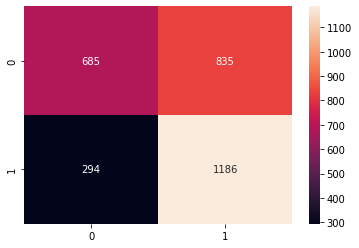

In [163]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='rocket', fmt = 'g')
plt.show()

#### (2) 알고리즘2 - Random Forest

In [164]:
model_rf = RandomForestClassifier(random_state=2022)
model_rf.fit(x_train, y_train)
y_pred = model_rf.predict(x_val)
score1 = accuracy_score(y_val, y_pred).round(3)
score2 = recall_score(y_val, y_pred).round(3)
print(score1, score2)
result['Randon Forest ac'] = score1
result['Randon Forest re'] = score2

0.698 0.704


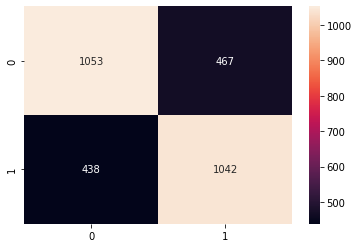

In [165]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='rocket', fmt = 'g')
plt.show()

#### (3) 알고리즘3 - XGBoost

In [166]:
model_xgb = XGBClassifier(eval_metric='logloss')
param = {'max_depth': range(1,10), 'n_estimators': range(1, 50, 10), 'learning_rate':[0.01, 0.3]}
model_xgb = GridSearchCV(model_xgb, param, scoring='recall')
model_xgb.fit(x_train, y_train)
y_pred = model_xgb.predict(x_val)
score1 = accuracy_score(y_val, y_pred).round(3)
score2 = recall_score(y_val, y_pred).round(3)
print(score1, score2)
result['XGBoost ac'] = score1
result['XGBoost re'] = score2

0.624 0.801


In [167]:
print(model_xgb.best_params_)
print(model_xgb.best_score_)

{'learning_rate': 0.01, 'max_depth': 1, 'n_estimators': 1}
0.7790500992592908


In [168]:
print(classification_report(y_val, y_pred))

              precision    recall  f1-score   support

           0       0.70      0.45      0.55      1520
           1       0.59      0.80      0.68      1480

    accuracy                           0.62      3000
   macro avg       0.64      0.63      0.61      3000
weighted avg       0.64      0.62      0.61      3000



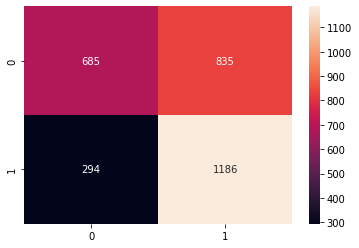

In [169]:
sns.heatmap(confusion_matrix(y_val, y_pred), annot=True, cmap='rocket', fmt = 'g')
plt.show()

## 4.모델링2 : DL

### 4.1 모델링을 위한 함수 불러오기

In [170]:
# pip install eli5

In [171]:
# pip install scikeras

In [172]:
import tensorflow as tf
from tensorflow import keras
from scikeras.wrappers import KerasClassifier, KerasRegressor
import eli5
from eli5.sklearn import PermutationImportance
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

### 4.2 모델링

* 딥러닝 모델을 3개 이상 생성하시오
    * 다양한 구조의 모델 3개 이상을 설계하시오. (히든레이어, 노드 수 조절)
    * 각 모델은 구조가 달라야 합니다.
    * 구조를 그렇게 구성한 이유를 주석으로 기술해 봅시다.
* 각 모델마다 
    * 구조를 summary 혹은 plot model로 확인
    * 학습 후 history plot 그리고 적절하게 학습이 되었는지 확인    

In [173]:
x_train.shape

(12000, 18)

In [174]:
y_train_tg = to_categorical(y_train, 2)
y_val_tg = to_categorical(y_val, 2)
y_test_tg = to_categorical(y_test, 2)

#### (1) 모델1

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 2)                 38        
                                                                 
Total params: 38
Trainable params: 38
Non-trainable params: 0
_________________________________________________________________


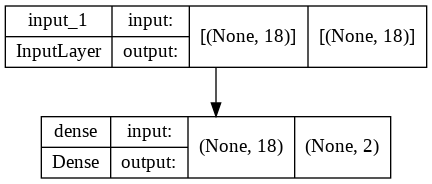

In [175]:
keras.backend.clear_session()

model_dl1 = keras.models.Sequential()

model_dl1.add(keras.layers.Input(shape=(18,)))
model_dl1.add(keras.layers.Dense(2, activation='sigmoid'))

model_dl1.compile(loss=keras.losses.binary_crossentropy, optimizer='nadam', metrics=['accuracy'])
model_dl1.summary()
keras.utils.plot_model(model_dl1, show_shapes=True)

In [176]:
es = EarlyStopping(monitor='val_loss', min_delta=0, patience=5, verbose=1, restore_best_weights=True)

In [177]:
hist1 = model_dl1.fit(x_train_s, y_train_tg, epochs=1000, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.7089 - accuracy: 0.5435 - val_loss: 0.6870 - val_accuracy: 0.5604
Epoch 2/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6784 - accuracy: 0.5881 - val_loss: 0.6712 - val_accuracy: 0.5925
Epoch 3/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6641 - accuracy: 0.6087 - val_loss: 0.6615 - val_accuracy: 0.6054
Epoch 4/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6546 - accuracy: 0.6175 - val_loss: 0.6552 - val_accuracy: 0.6129
Epoch 5/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6482 - accuracy: 0.6216 - val_loss: 0.6510 - val_accuracy: 0.6162
Epoch 6/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6438 - accuracy: 0.6279 - val_loss: 0.6483 - val_accuracy: 0.6142
Epoch 7/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6406 - accuracy: 0.6317 - val_loss: 0.6465 - val_accuracy:

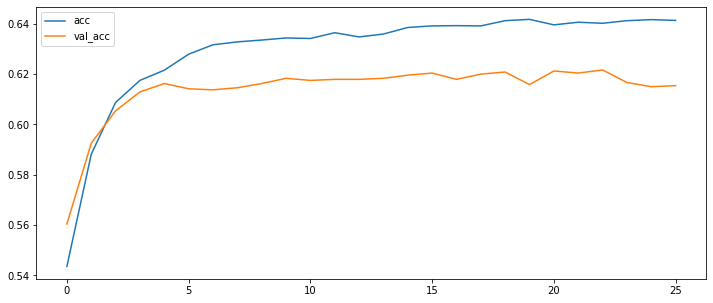

In [178]:
plt.figure(figsize=(12,5))
plt.plot(hist1.history['accuracy'], label='acc')
plt.plot(hist1.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

#### (2) 모델2

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 128)               2432      
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dense_3 (Dense)             (None, 16)                528       
                                                                 
 dense_4 (Dense)             (None, 2)                 34        
                                                                 
Total params: 13,330
Trainable params: 13,330
Non-trainable p

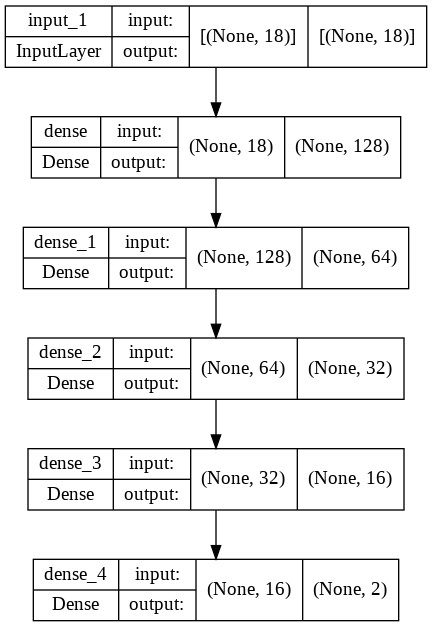

In [179]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(18,))
hl = keras.layers.Dense(128, activation='relu')(il)
hl = keras.layers.Dense(64, activation='relu')(hl)
hl = keras.layers.Dense(32, activation='relu')(hl)
hl = keras.layers.Dense(16, activation='relu')(hl)
ol = keras.layers.Dense(2, activation='sigmoid')(hl)

model_dl2 = keras.models.Model(il, ol)

model_dl2.compile(loss=keras.losses.binary_crossentropy, optimizer='nadam', metrics=['accuracy'])
model_dl2.summary()
keras.utils.plot_model(model_dl2, show_shapes=True)

In [180]:
hist2 = model_dl2.fit(x_train_s, y_train_tg, epochs=1000, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/1000
300/300 [==============================] - 2s 3ms/step - loss: 0.6475 - accuracy: 0.6266 - val_loss: 0.6373 - val_accuracy: 0.6404
Epoch 2/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6226 - accuracy: 0.6542 - val_loss: 0.6338 - val_accuracy: 0.6417
Epoch 3/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6152 - accuracy: 0.6635 - val_loss: 0.6373 - val_accuracy: 0.6500
Epoch 4/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6108 - accuracy: 0.6672 - val_loss: 0.6205 - val_accuracy: 0.6704
Epoch 5/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6069 - accuracy: 0.6710 - val_loss: 0.6255 - val_accuracy: 0.6621
Epoch 6/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6044 - accuracy: 0.6766 - val_loss: 0.6194 - val_accuracy: 0.6737
Epoch 7/1000
300/300 [==============================] - 1s 2ms/step - loss: 0.6026 - accuracy: 0.6752 - val_loss: 0.6244 - val_accuracy:

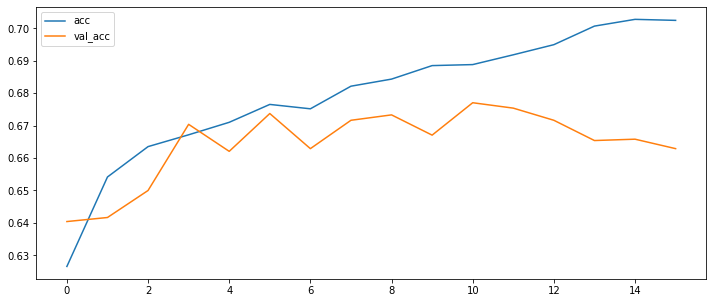

In [181]:
plt.figure(figsize=(12,5))
plt.plot(hist2.history['accuracy'], label='acc')
plt.plot(hist2.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

#### (3) 모델3

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 256)               4864      
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 dense_2 (Dense)             (None, 64)                8256      
                                                                 
 dense_3 (Dense)             (None, 32)                2080      
                                                                 
 dense_4 (Dense)             (None, 16)                528       
                                                                 
 dense_5 (Dense)             (None, 2)                 34    

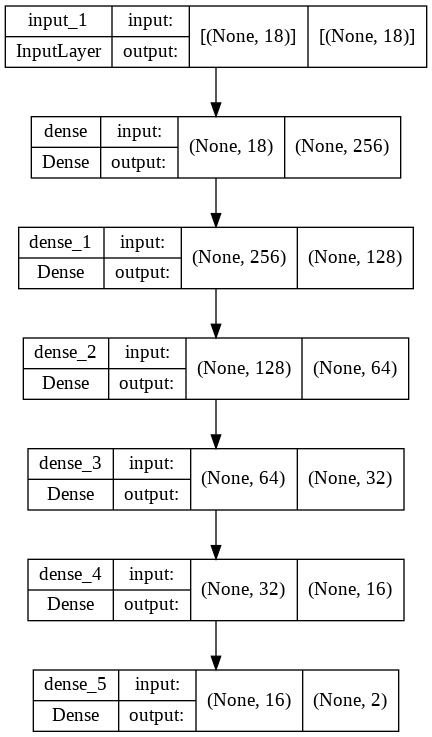

In [182]:
keras.backend.clear_session()

il = keras.layers.Input(shape=(18,))
hl = keras.layers.Dense(256, activation='swish')(il)
hl = keras.layers.Dense(128, activation='swish')(hl)
hl = keras.layers.Dense(64, activation='swish')(hl)
hl = keras.layers.Dense(32, activation='swish')(hl)
hl = keras.layers.Dense(16, activation='swish')(hl)
ol = keras.layers.Dense(2, activation='sigmoid')(hl)

model_dl3 = keras.models.Model(il, ol)

model_dl3.compile(loss=keras.losses.binary_crossentropy, optimizer='nadam', metrics=['accuracy'])
model_dl3.summary()
keras.utils.plot_model(model_dl3, show_shapes=True)

In [183]:
hist3 = model_dl3.fit(x_train_s, y_train_tg, epochs=1000, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/1000
300/300 [==============================] - 3s 4ms/step - loss: 0.6442 - accuracy: 0.6269 - val_loss: 0.6422 - val_accuracy: 0.6279
Epoch 2/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.6333 - accuracy: 0.6391 - val_loss: 0.6445 - val_accuracy: 0.6283
Epoch 3/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.6252 - accuracy: 0.6504 - val_loss: 0.6244 - val_accuracy: 0.6546
Epoch 4/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.6194 - accuracy: 0.6584 - val_loss: 0.6197 - val_accuracy: 0.6629
Epoch 5/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.6162 - accuracy: 0.6572 - val_loss: 0.6194 - val_accuracy: 0.6658
Epoch 6/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.6142 - accuracy: 0.6636 - val_loss: 0.6178 - val_accuracy: 0.6725
Epoch 7/1000
300/300 [==============================] - 1s 3ms/step - loss: 0.6112 - accuracy: 0.6624 - val_loss: 0.6269 - val_accuracy:

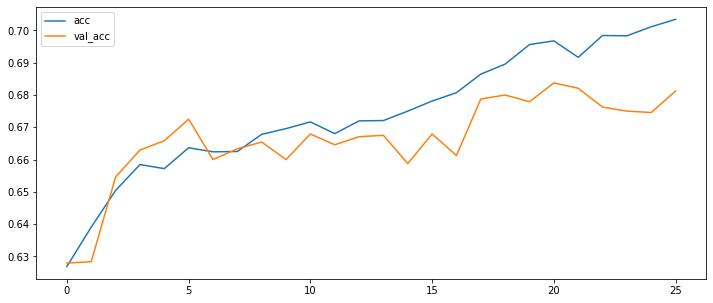

In [184]:
plt.figure(figsize=(12, 5))

plt.plot(hist3.history['accuracy'], label='acc')
plt.plot(hist3.history['val_accuracy'], label='val_acc')
plt.legend()
plt.show()

#### (4) 딥러닝 모델 성능 비교

In [198]:
y_pred_dl1 = model_dl1.predict(x_val_s)

pred_test1 = np.argmax(y_pred_dl1, axis=1)
y_test_dl1 = np.argmax(y_test_tg, axis=1)

print(classification_report(y_test_dl1, pred_test1))

              precision    recall  f1-score   support

           0       0.53      0.50      0.51      1540
           1       0.50      0.52      0.51      1460

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



In [199]:
y_pred_dl2 = model_dl2.predict(x_val_s)

pred_test2 = np.argmax(y_pred_dl2, axis=1)
y_test_dl2 = np.argmax(y_test_tg, axis=1)

print(classification_report(y_test_dl2, pred_test2))

              precision    recall  f1-score   support

           0       0.52      0.53      0.53      1540
           1       0.50      0.49      0.49      1460

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



In [200]:
y_pred_dl3 = model_dl3.predict(x_val_s)

pred_test3 = np.argmax(y_pred_dl3, axis=1)
y_test_dl3 = np.argmax(y_test_tg, axis=1)

print(classification_report(y_test_dl3, pred_test3))

              precision    recall  f1-score   support

           0       0.53      0.52      0.52      1540
           1       0.50      0.50      0.50      1460

    accuracy                           0.51      3000
   macro avg       0.51      0.51      0.51      3000
weighted avg       0.51      0.51      0.51      3000



## 5.성능 비교
* 총 모델이 최소한 ML 3가지, DL 3가지 입니다. 이에 대해 성능을 평가합니다.
* 평가를 위한 적절한 지표(metric)을 결정하고 비교합니다.
    * **평가지표 선정 이유**를 주석으로 기술하시오.
* 최종 모델을 **선정하게 된 근거**를 주석으로 기술하시오.

### 5.1 평가지표 결정

* 어떤 지표로 성능을 비교할지 결정합니다.
* 결정 이유를 기술합니다.

> 제시된 목표는 현재 고객수 유지를 위해 고객 이탈을 막는 것

> 고객 이탈 여부를 정확히 아는 것이 필요함

> 그러므로 모델을 설계했을 때 실제 이탈 고객을 True(번호이동을 함)라고 정확히 인식하는 것이 중요함

> 따라서 평가지표로 Recall을 사용하기로 결정함

### 5.2 성능 비교

* 성능을 비교하고, 최적의 모델을 선정하시오.
* 선정 근거를 주석으로 기술하시오.

> 머신러닝 모델들의 실제 성능(y_test 활용)

In [188]:
y_pred_dt = model_dt.predict(x_val)
print(classification_report(y_pred_dt, y_test))

              precision    recall  f1-score   support

           0       0.33      0.52      0.40       979
           1       0.68      0.49      0.57      2021

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.56      0.50      0.51      3000



In [189]:
y_pred_rf = model_rf.predict(x_val)
print(classification_report(y_pred_rf, y_test))

              precision    recall  f1-score   support

           0       0.50      0.52      0.51      1491
           1       0.51      0.49      0.50      1509

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



In [190]:
y_pred_xgb = model_xgb.predict(x_val)
print(classification_report(y_pred_xgb, y_test))

              precision    recall  f1-score   support

           0       0.33      0.52      0.40       979
           1       0.68      0.49      0.57      2021

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.49      3000
weighted avg       0.56      0.50      0.51      3000



> 1(이탈) 의 recall값을 비교해봤을 때 딥러닝 모델 3의 recall값이 가장 높게 나옴

> 평가지표로 recall을 결정했기 때문에 결과값이 가장 높은 모델이 성능이 좋을 것이라고 판단

> 따라서 현재까지 설계한 6개의 모델 중에서 딥러닝 모델 3을 채택함

### 5.3 추가 분석 및 의견

* 성능을 한눈에 비교할 수 있는 방법을 고안해서 수행해 봅시다.

In [201]:
score3 = recall_score(y_test_dl1, pred_test1).round(3)
score4 = recall_score(y_test_dl2, pred_test2).round(3)
score5 = recall_score(y_test_dl3, pred_test3).round(3)

result['Deep Learning 1 re'] = score3
result['Deep Learning 2 re'] = score4
result['Deep Learning 3 re'] = score5

In [202]:
result

{'Decision Tree ac': 0.624,
 'Decision Tree re': 0.801,
 'Deep Learning 1 re': 0.519,
 'Deep Learning 2 re': 0.487,
 'Deep Learning 3 re': 0.501,
 'Randon Forest ac': 0.698,
 'Randon Forest re': 0.704,
 'XGBoost ac': 0.624,
 'XGBoost re': 0.801}

* 여러분의 선정한 모델로 비즈니스 문제를 해결할 수 있을까요? 여러분의 의견을 적어 봅시다.

> 모델 성능을 좀 더 개선해 recall값을 높히면 사용할 수 있을 것이라고 생각함

* 비즈니스 문제 해결을 위해서 더 해볼 수 있는 것은 무엇인가요?

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 18)]              0         
                                                                 
 dense (Dense)               (None, 512)               9728      
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 64)                8256      
                                                                 
 dense_4 (Dense)             (None, 32)                2080      
                                                                 
 dense_5 (Dense)             (None, 16)                528   

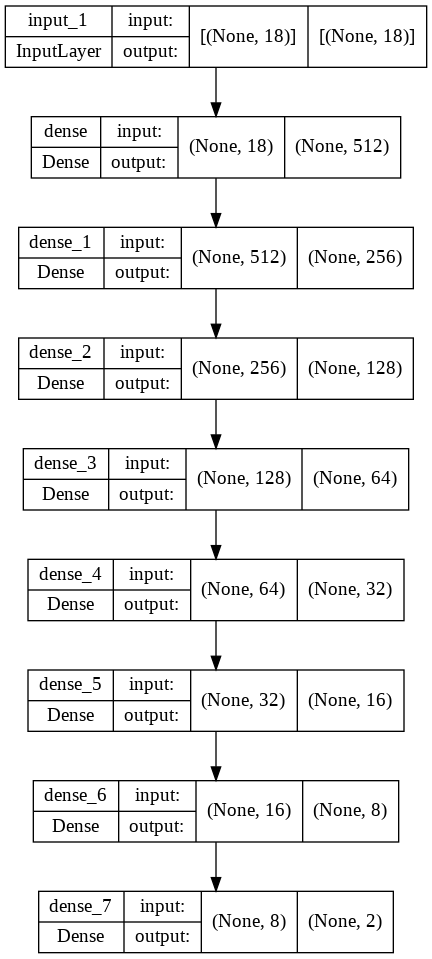

In [204]:
# 딥러닝 3번 모델 추가 개선
keras.backend.clear_session()

il = keras.layers.Input(shape=(18,))
hl = keras.layers.Dense(512, activation='swish')(il)
hl = keras.layers.Dense(256, activation='swish')(hl)
hl = keras.layers.Dense(128, activation='swish')(hl)
hl = keras.layers.Dense(64, activation='swish')(hl)
hl = keras.layers.Dense(32, activation='swish')(hl)
hl = keras.layers.Dense(16, activation='swish')(hl)
hl = keras.layers.Dense(8, activation='swish')(hl)
ol = keras.layers.Dense(2, activation='sigmoid')(hl)

model_dl4 = keras.models.Model(il, ol)

model_dl4.compile(loss=keras.losses.binary_crossentropy, optimizer='nadam', metrics=['accuracy'])
model_dl4.summary()
keras.utils.plot_model(model_dl4, show_shapes=True)

In [205]:
hist4 = model_dl4.fit(x_train_s, y_train_tg, epochs=1000, verbose=1, validation_split=0.2, callbacks=[es])

Epoch 1/1000
300/300 [==============================] - 5s 8ms/step - loss: 0.6454 - accuracy: 0.6251 - val_loss: 0.6431 - val_accuracy: 0.6233
Epoch 2/1000
300/300 [==============================] - 2s 6ms/step - loss: 0.6306 - accuracy: 0.6388 - val_loss: 0.6372 - val_accuracy: 0.6404
Epoch 3/1000
300/300 [==============================] - 2s 6ms/step - loss: 0.6215 - accuracy: 0.6541 - val_loss: 0.6206 - val_accuracy: 0.6633
Epoch 4/1000
300/300 [==============================] - 2s 6ms/step - loss: 0.6180 - accuracy: 0.6567 - val_loss: 0.6190 - val_accuracy: 0.6612
Epoch 5/1000
300/300 [==============================] - 2s 6ms/step - loss: 0.6144 - accuracy: 0.6610 - val_loss: 0.6224 - val_accuracy: 0.6612
Epoch 6/1000
300/300 [==============================] - 2s 6ms/step - loss: 0.6134 - accuracy: 0.6650 - val_loss: 0.6227 - val_accuracy: 0.6571
Epoch 7/1000
300/300 [==============================] - 2s 6ms/step - loss: 0.6134 - accuracy: 0.6647 - val_loss: 0.6146 - val_accuracy:

In [206]:
y_pred_dl4 = model_dl4.predict(x_val_s)

pred_test4 = np.argmax(y_pred_dl4, axis=1)
y_test_dl4 = np.argmax(y_test_tg, axis=1)

print(classification_report(y_test_dl4, pred_test4))

              precision    recall  f1-score   support

           0       0.51      0.48      0.50      1540
           1       0.49      0.52      0.50      1460

    accuracy                           0.50      3000
   macro avg       0.50      0.50      0.50      3000
weighted avg       0.50      0.50      0.50      3000



> 성능이 조금 더 개선됨을 확인